In [ ]:
"""
************************************************************************************************
************************************************************************************************

The purpose of this notebook is to create a dataset to use In a term project for CIS732 At Kansas State University.
This notebook is adapted from 
https://github.com/rdbraatz/data-driven-prediction-of-battery-cycle-life-before-capacity-degradation 

The data and experiment information can be found at https://data.matr.io/1/projects/5c48dd2bc625d700019f3204

The final dictionary of this notebook, bat_dict, is a collection of Data from 124 Battery Cells With 4 keys:
['cycle_life', 'charge_policy', 'summary', 'cycles']

'cycle_life' An integer, and is the target of machine learning. It is the number of cycles until the battery fails

'summary' is a Nested dictionary with 8 keys:
    ['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle']
        *The length of each of the 8 arrays is the cycle_life(int) Of the cell
        *Each value of The 8 arrays Correspondences to each cycle of the cell
    
'cycles' is a Nested dictionary with cycle_life(int) number of keys:
    ['1', '2', … 'cycle_life'(int)]
    
        Each key In 'cycles' Is a nested dictionary with 8 keys:
            ['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't']
                *The length of each of the arrays is the Length of time 't' of each cycle
                *With the exception of 'Qdlin' & 'Tdlin', Which is normalized to Array length 1000
    
************************************************************************************************
************************************************************************************************
"""

In [2]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from scipy.stats import skew,kurtosis

In [3]:
########################################
# Original data
# from https://data.matr.io/1/projects/5c48dd2bc625d700019f3204
########################################

matFilename1 = '2017-05-12_batchdata_updated_struct_errorcorrect.mat'
matFilename2 = '2017-06-30_batchdata_updated_struct_errorcorrect.mat'
matFilename3 = '2018-04-12_batchdata_updated_struct_errorcorrect.mat'

In [4]:
f = h5py.File(matFilename1)
list(f.keys())

['#refs#', '#subsystem#', 'batch', 'batch_date']

In [5]:
batch=f['batch']
list(batch.keys())

['Vdlin',
 'barcode',
 'channel_id',
 'cycle_life',
 'cycles',
 'policy',
 'policy_readable',
 'summary']

In [6]:
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    cl = f[batch['cycle_life'][i,0]][()]
    policy = f[batch['policy_readable'][i,0]][()].tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]][()]))
        Qc = np.hstack((f[cycles['Qc'][j,0]][()]))
        Qd = np.hstack((f[cycles['Qd'][j,0]][()]))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]][()]))
        T = np.hstack((f[cycles['T'][j,0]][()]))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]][()]))
        V = np.hstack((f[cycles['V'][j,0]][()]))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]][()]))
        t = np.hstack((f[cycles['t'][j,0]][()]))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b1c' + str(i)
    bat_dict[key]=   cell_dict

In [7]:
batch_dict1 = bat_dict
batch_dict1.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c8', 'b1c9', 'b1c10', 'b1c11', 'b1c12', 'b1c13', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c22', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])

#Batch2

In [8]:
f = h5py.File(matFilename2)
batch=f['batch']

In [9]:
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    cl = f[batch['cycle_life'][i,0]][()]
    policy = f[batch['policy_readable'][i,0]][()].tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]][()]))
        Qc = np.hstack((f[cycles['Qc'][j,0]][()]))
        Qd = np.hstack((f[cycles['Qd'][j,0]][()]))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]][()]))
        T = np.hstack((f[cycles['T'][j,0]][()]))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]][()]))
        V = np.hstack((f[cycles['V'][j,0]][()]))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]][()]))
        t = np.hstack((f[cycles['t'][j,0]][()]))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b2c' + str(i)
    bat_dict[key]=   cell_dict

In [10]:
batch_dict2 = bat_dict
batch_dict2.keys()

dict_keys(['b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c7', 'b2c8', 'b2c9', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c15', 'b2c16', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47'])

Batch 3

In [11]:
f = h5py.File(matFilename3)
batch=f['batch']

In [12]:
num_cells = batch['summary'].shape[0]
x=range(num_cells)
bat_dict = {}
for i in x:
    cl = f[batch['cycle_life'][i,0]][()]
    policy = f[batch['policy_readable'][i,0]][()].tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]][()]))
        Qc = np.hstack((f[cycles['Qc'][j,0]][()]))
        Qd = np.hstack((f[cycles['Qd'][j,0]][()]))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]][()]))
        T = np.hstack((f[cycles['T'][j,0]][()]))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]][()]))
        V = np.hstack((f[cycles['V'][j,0]][()]))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]][()]))
        t = np.hstack((f[cycles['t'][j,0]][()]))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b3c' + str(i)
    bat_dict[key]=   cell_dict

In [13]:
batch_dict3 = bat_dict
batch_dict3.keys()

dict_keys(['b3c0', 'b3c1', 'b3c2', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c23', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30', 'b3c31', 'b3c32', 'b3c33', 'b3c34', 'b3c35', 'b3c36', 'b3c37', 'b3c38', 'b3c39', 'b3c40', 'b3c41', 'b3c42', 'b3c43', 'b3c44', 'b3c45'])

In [14]:
# Dictionary copies, to preserve batch_dict1,batch_dict2,batch_dict3
# And prevent having to rerun above code, In case of errors
batch1 = batch_dict1.copy()
batch2 = batch_dict2.copy()
batch3 = batch_dict3.copy()

In [15]:
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [16]:
numBat1 = len(batch1.keys())
numBat1

41

In [17]:
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482]
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [18]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

In [19]:
numBat1 = len(batch1.keys())
numBat1

41

In [20]:
numBat2 = len(batch2.keys())
numBat2

43

In [21]:
numBat3 = len(batch3.keys())
numBat3

40

In [22]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [23]:
bat_dict = {**batch1, **batch2, **batch3}
bat_dict.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45', 'b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47', 'b3c0', 'b3c1', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30

In [ ]:
"""
************************************************************************************************
************************************************************************************************
At this point, bat_dict Is a nested dictionary that will be as the dataset of the project

Below Is some Code intended for description and exploration of the dataset

************************************************************************************************
************************************************************************************************
"""

In [25]:
bat_dict['b1c0'].keys()

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

In [26]:
print(bat_dict['b1c0']['cycle_life'])

[[1852.]]


[ 148.  300.  335.  429.  429.  438.  444.  457.  458.  459.  461.  461.
  462.  463.  465.  466.  468.  471.  477.  478.  480.  481.  483.  485.
  487.  487.  489.  492.  494.  495.  498.  499.  499.  502.  509.  511.
  513.  519.  520.  527.  534.  535.  541.  559.  561.  599.  616.  617.
  625.  636.  648.  651.  667.  691.  702.  703.  704.  709.  713.  719.
  731.  731.  742.  757.  772.  786.  788.  788.  796.  813.  816.  817.
  825.  828.  828.  842.  850.  854.  857.  858.  858.  860.  862.  870.
  870.  876.  876.  880.  917.  923.  932.  935.  940.  966.  989. 1002.
 1009. 1014. 1017. 1028. 1039. 1046. 1048. 1051. 1054. 1063. 1074. 1078.
 1093. 1115. 1146. 1155. 1158. 1284. 1315. 1434. 1638. 1642. 1709. 1801.
 1836. 1852. 2160. 2237.]


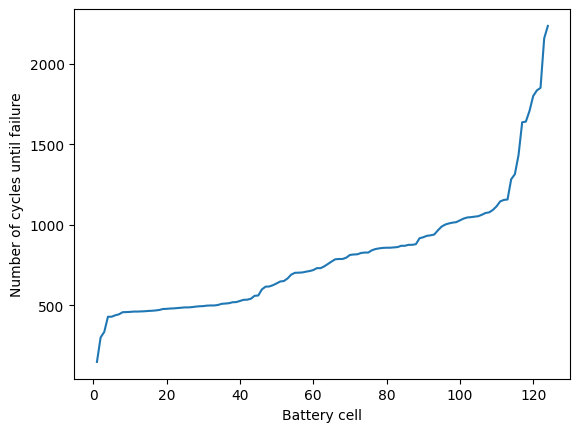

In [34]:
cycles = []
for i in bat_dict.keys():
    cycles.append(bat_dict[i]['cycle_life'][0][0])
    
cycles = np.array(cycles)
cycles = np.sort(cycles)
print(cycles)
plt.plot(np.linspace(1,124,124),cycles)
plt.xlabel('Battery cell')
plt.ylabel('Number of cycles until failure')
plt.show()

In [28]:
for i in bat_dict.keys():
    print(bat_dict[i]['charge_policy'])

3.6C(80%)-3.6C
3.6C(80%)-3.6C
3.6C(80%)-3.6C
4C(80%)-4C
4C(80%)-4C
4.4C(80%)-4.4C
4.8C(80%)-4.8C
4.8C(80%)-4.8C
5.4C(40%)-3.6C
5.4C(50%)-3C
5.4C(60%)-3C
5.4C(60%)-3C
5.4C(60%)-3.6C
5.4C(60%)-3.6C
5.4C(70%)-3C
5.4C(70%)-3C
5.4C(80%)-5.4C
5.4C(80%)-5.4C
6C(30%)-3.6C
6C(40%)-3C
6C(40%)-3C
6C(40%)-3.6C
6C(40%)-3.6C
6C(50%)-3C
6C(50%)-3C
6C(50%)-3.6C
6C(50%)-3.6C
6C(60%)-3C
6C(60%)-3C
7C(30%)-3.6C
7C(30%)-3.6C
7C(40%)-3C
7C(40%)-3C
7C(40%)-3.6C
7C(40%)-3.6C
8C(15%)-3.6C
8C(15%)-3.6C
8C(25%)-3.6C
8C(25%)-3.6C
8C(35%)-3.6C
8C(35%)-3.6C
1C(4%)-6C
2C(10%)-6C
2C(2%)-5C
2C(7%)-5.5C
3.6C(22%)-5.5C
3.6C(2%)-4.85C
3.6C(30%)-6C
3.6C(9%)-5C
4C(13%)-5C
4C(31%)-5
4C(40%)-6C
4C(4%)-4.85C
4.4C(24%)-5C
4.4C(47%)-5.5C
4.4C(55%)-6C
4.4C(8%)-4.85C
4.65C(19%)-4.85C
4.65C(44%)-5C
4.65C(69%)-6C
4.8C(80%)-4.8C
4.8C(80%)-4.8C
4.8C(80%)-4.8C
4.9C(27%)-4.75C
4.9C(61%)-4.5C
4.9C(69%)-4.25C
5.2C(10%)-4.75C
5.2C(37%)-4.5C
5.2C(50%)-4.25C
5.2C(58%)-4C
5.2C(66%)-3.5C
5.2C(71%)-3C
5.6C(25%)-4.5C
5.6C(38%)-4.25C
5.6C(47%)-

In [29]:
bat_dict['b1c0']['summary'].keys()

dict_keys(['IR', 'QC', 'QD', 'Tavg', 'Tmin', 'Tmax', 'chargetime', 'cycle'])

In [30]:
for i in bat_dict['b1c0']['summary'].keys():
    print(bat_dict['b1c0']['summary'][i])
    print(len(bat_dict['b1c0']['summary'][i]))

[0.         0.01674235 0.01672431 ... 0.0181332  0.0181233  0.0181211 ]
1851
[0.         1.0710422  1.0716741  ... 0.88449496 0.88432896 0.8840425 ]
1851
[0.         1.0706892  1.0719005  ... 0.88462406 0.88433141 0.88280821]
1851
[ 0.         31.87501078 31.93149033 ... 32.70054223 32.99059246
 32.96182749]
1851
[ 0.       29.56613  29.604385 ... 30.243074 30.337559 30.634762]
1851
[ 0.       35.652016 35.692978 ... 36.786781 36.923153 36.535774]
1851
[ 0.         13.34125    13.42577667 ... 17.04515833 17.15257333
 17.35889667]
1851
[1.000e+00 2.000e+00 3.000e+00 ... 1.849e+03 1.850e+03 1.851e+03]
1851


[0.         0.01674235 0.01672431 ... 0.0181332  0.0181233  0.0181211 ]


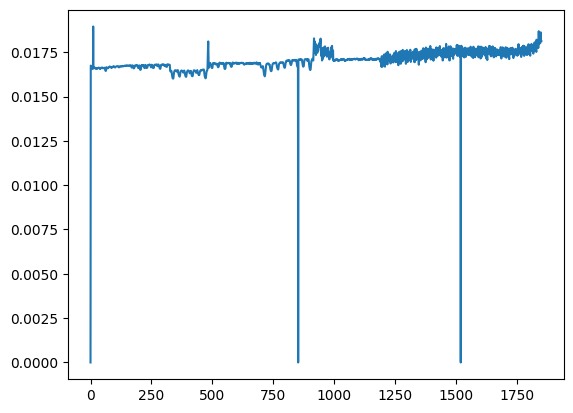

[0.         1.0710422  1.0716741  ... 0.88449496 0.88432896 0.8840425 ]


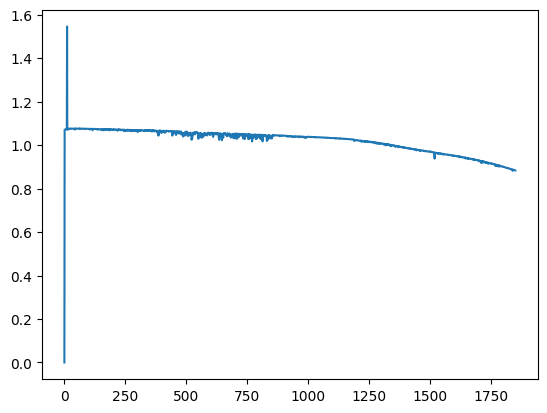

[0.         1.0706892  1.0719005  ... 0.88462406 0.88433141 0.88280821]


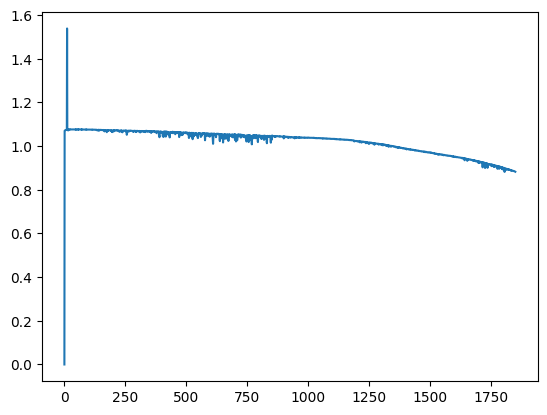

[ 0.         31.87501078 31.93149033 ... 32.70054223 32.99059246
 32.96182749]


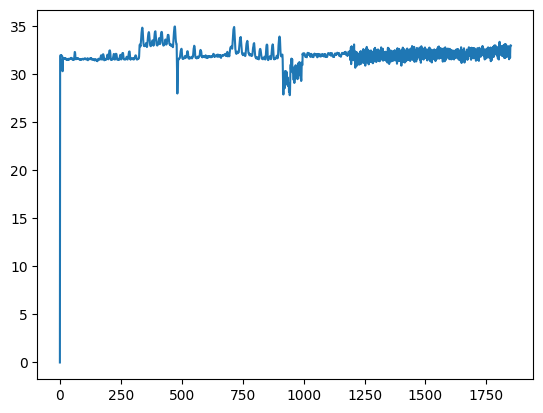

[ 0.       29.56613  29.604385 ... 30.243074 30.337559 30.634762]


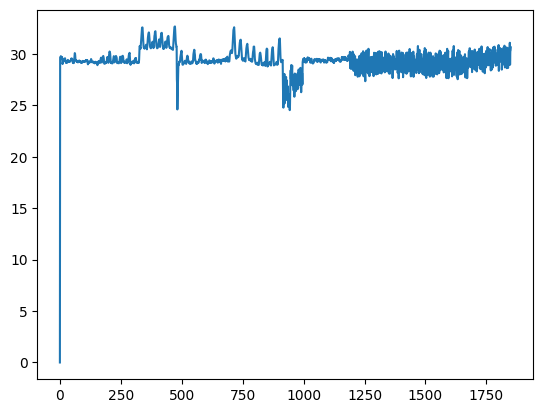

[ 0.       35.652016 35.692978 ... 36.786781 36.923153 36.535774]


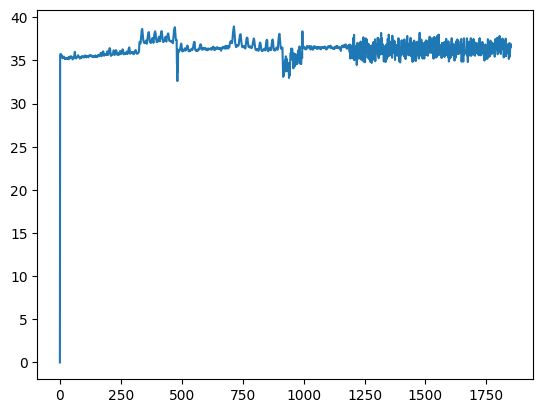

[ 0.         13.34125    13.42577667 ... 17.04515833 17.15257333
 17.35889667]


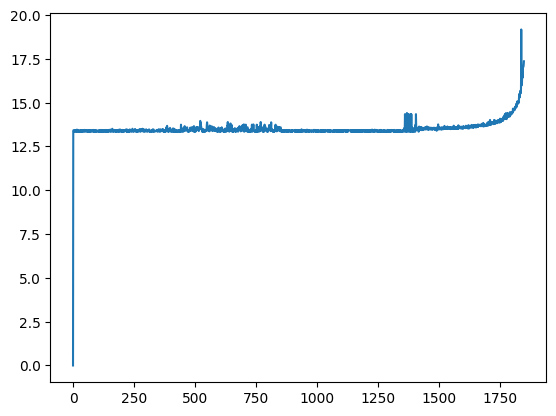

[1.000e+00 2.000e+00 3.000e+00 ... 1.849e+03 1.850e+03 1.851e+03]


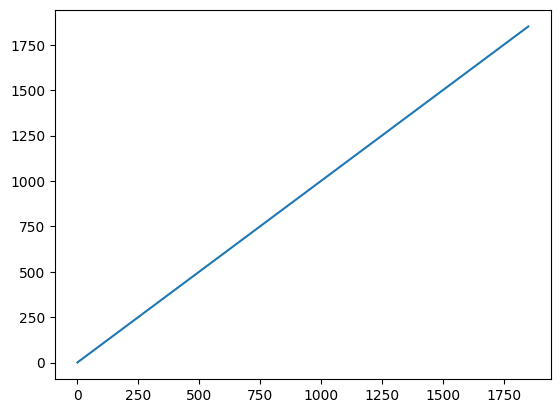

In [31]:
for i in bat_dict['b1c0']['summary'].keys():
    print(bat_dict['b1c0']['summary'][i])
    plt.plot(bat_dict['b1c0']['summary'][i])
    plt.show()

In [32]:
bat_dict['b1c0']['cycles'].keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [35]:
bat_dict['b1c0']['cycles']['1'].keys()

dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'])

1087
1000
1117
1000
I
[ 0.          0.21590753  0.35983085 ... -0.03422737 -0.03422737
  0.        ]


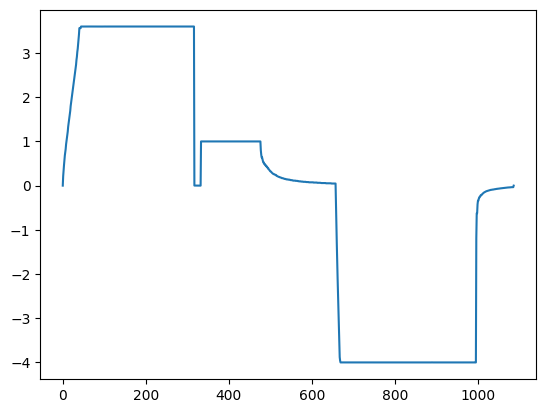

Qc
[0.0000000e+00 1.0935055e-06 1.0935055e-06 ... 1.0710422e+00 1.0710422e+00
 1.0710422e+00]


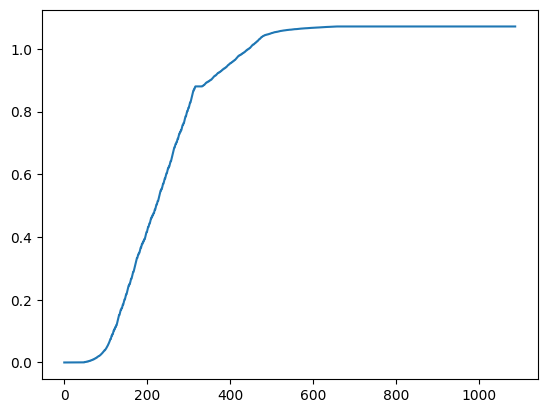

Qd
[0.        0.        0.        ... 1.0706892 1.0706892 1.0706892]


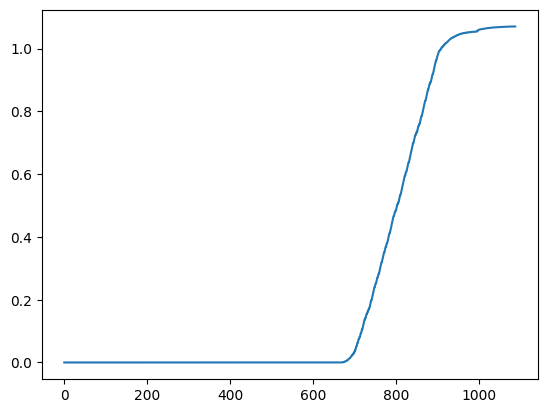

Qdlin
[-3.57431692e-04 -3.18524587e-04 -2.81852414e-04 -2.47206030e-04
 -2.14376291e-04 -1.83154053e-04 -1.53330172e-04 -1.24695504e-04
 -9.70409053e-05 -7.01572323e-05 -4.38353411e-05 -1.78660877e-05
  7.95967154e-06  3.38510806e-05  6.00172833e-05  8.66674235e-05
  1.14010645e-04  1.42256092e-04  1.71612907e-04  2.02290022e-04
  2.34405212e-04  2.67843697e-04  3.02454149e-04  3.38085240e-04
  3.74585640e-04  4.11804020e-04  4.49589083e-04  4.87847990e-04
  5.26667900e-04  5.66170505e-04  6.06477494e-04  6.47710557e-04
  6.89991385e-04  7.33441292e-04  7.78098091e-04  8.23811500e-04
  8.70405501e-04  9.17704078e-04  9.65531216e-04  1.01371090e-03
  1.06207427e-03  1.11062784e-03  1.15955958e-03  1.20906586e-03
  1.25934302e-03  1.31058743e-03  1.36299545e-03  1.41674205e-03
  1.47184453e-03  1.52824963e-03  1.58590378e-03  1.64475338e-03
  1.70474487e-03  1.76582465e-03  1.82795027e-03  1.89111761e-03
  1.95533076e-03  2.02059381e-03  2.08691087e-03  2.15428602e-03
  2.22272337e-03  2

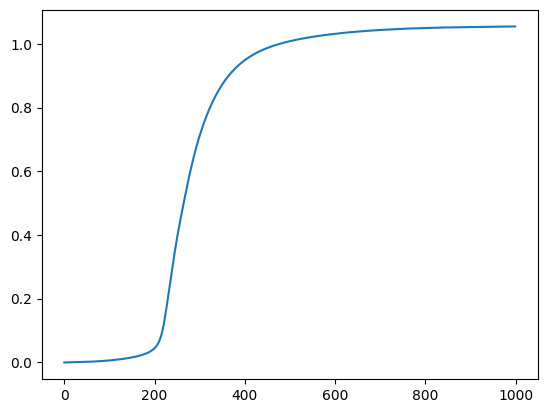

T
[31.632496 31.632496 31.632496 ... 31.712118 31.712118 31.712118]


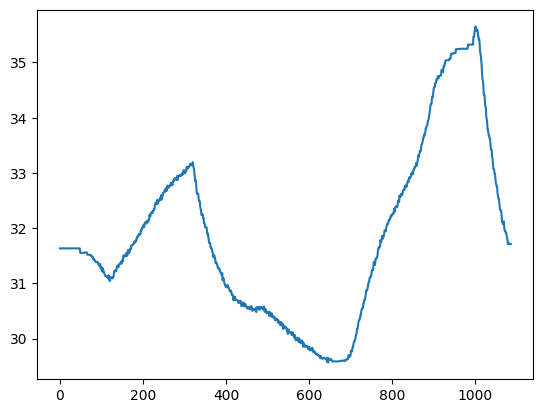

Tdlin
[29.58588212 29.58588989 29.58589615 29.58590103 29.58590468 29.58590725
 29.58590886 29.58590966 29.5859098  29.58590942 29.58590866 29.58590766
 29.58590655 29.5859055  29.58590463 29.58590409 29.58590402 29.58590456
 29.58590586 29.58590805 29.58591104 29.58591412 29.5859165  29.58591739
 29.58591597 29.58591145 29.58590304 29.58589089 29.58587803 29.58586809
 29.58586468 29.58587141 29.58589188 29.58592969 29.58598284 29.58603672
 29.58607501 29.5860814  29.58603958 29.58593321 29.58574762 29.58550825
 29.58528206 29.58513793 29.58514473 29.58537134 29.58588664 29.58674426
 29.58788533 29.58920066 29.59058083 29.59191641 29.59309799 29.59401613
 29.59459534 29.59487674 29.59492656 29.59481103 29.59459636 29.59434877
 29.59413445 29.59400001 29.59393749 29.59392951 29.59395866 29.59400758
 29.59405886 29.59409546 29.59411104 29.59411185 29.59410486 29.59409703
 29.59409533 29.59410674 29.59413703 29.59417922 29.59421855 29.59424018
 29.59422925 29.59417092 29.59405033 29.59386

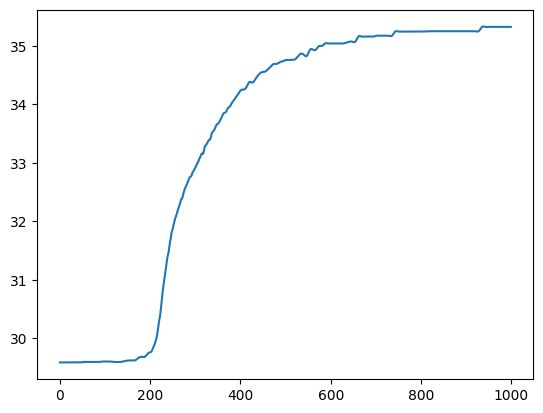

V
[2.0264158 2.0393877 2.0516596 ... 2.0124063 2.0224609 2.0250397]


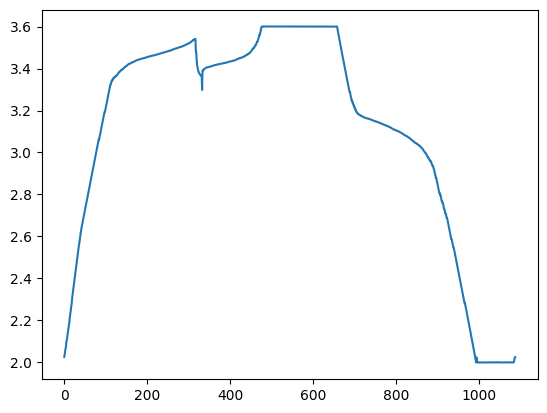

dQdV
[-1.26901199e-02 -1.26901199e-02 -1.26901199e-02 -1.26901199e-02
 -1.26901199e-02 -1.26901199e-02 -1.26901199e-02 -1.26901199e-02
 -1.26901199e-02 -1.26901199e-02 -1.26901199e-02 -1.26901199e-02
 -1.26901199e-02 -1.26901199e-02 -1.26901199e-02 -1.26901199e-02
 -1.26901199e-02 -1.26901199e-02 -1.26901199e-02 -1.26901199e-02
 -1.26901199e-02 -1.26901199e-02 -1.28281628e-02 -1.45371709e-02
 -1.78171442e-02 -2.26680826e-02 -2.90899862e-02 -3.70828549e-02
 -4.66466889e-02 -5.74726840e-02 -6.82986791e-02 -7.89866313e-02
 -8.81036183e-02 -9.56496401e-02 -1.01624697e-01 -1.06028788e-01
 -1.08861915e-01 -1.10124076e-01 -1.10124076e-01 -1.10124076e-01
 -1.10124076e-01 -1.10124076e-01 -1.10124076e-01 -1.10124076e-01
 -1.10124076e-01 -1.10124076e-01 -1.10124076e-01 -1.10124076e-01
 -1.10124076e-01 -1.10144301e-01 -1.10566332e-01 -1.11390168e-01
 -1.12615811e-01 -1.14243258e-01 -1.16272511e-01 -1.18703570e-01
 -1.21487359e-01 -1.24271148e-01 -1.27034711e-01 -1.29396469e-01
 -1.31356422e-01 -1.

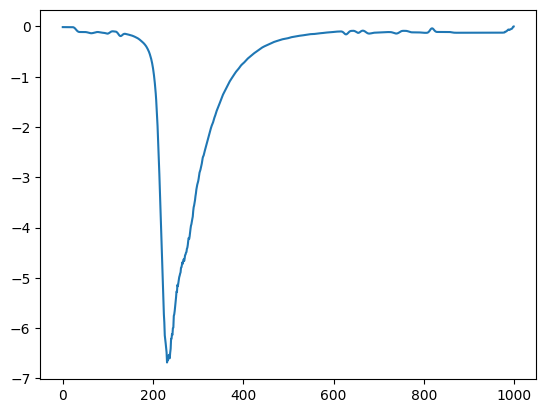

t
[0.00000000e+00 2.41666667e-03 2.91166667e-03 ... 5.43651150e+01
 5.43726733e+01 5.43748267e+01]


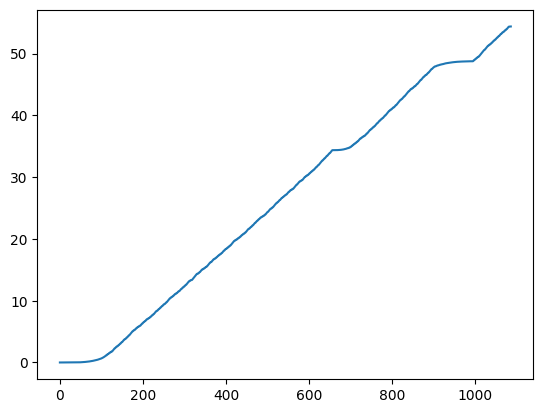

In [33]:
print(bat_dict['b1c0']['cycles']['1']['Qc'].shape[0])
print(bat_dict['b1c0']['cycles']['1']['Tdlin'].shape[0])
print(bat_dict['b1c0']['cycles']['2']['Qc'].shape[0])
print(bat_dict['b1c0']['cycles']['2']['Tdlin'].shape[0])
for i in bat_dict['b1c0']['cycles']['0'].keys():
    print(i)
    print(bat_dict['b1c0']['cycles']['1'][i])
    plt.plot(bat_dict['b1c0']['cycles']['1'][i])
    plt.show()